In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/preprocessed_ev_data.csv')

# Preview the data
df.head()


,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,...,county_encoded,months_since_start,ev_total_lag1,ev_total_lag2,ev_total_lag3,ev_total_roll_mean_3,ev_total_pct_change_1,ev_total_pct_change_3,cumulative_ev,ev_growth_slope
0,2018-05-31,Ada,ID,Passenger,0.0,2.0,2.0,341.0,343.0,0.58,...,0,5,2.0,2.0,2.0,2.0,0.0,0.0,10.0,1.857143
1,2018-06-30,Ada,ID,Passenger,0.0,2.0,2.0,332.0,334.0,0.60,...,0,6,2.0,2.0,2.0,2.0,0.0,0.0,12.0,2.000000
2,2018-07-31,Ada,ID,Passenger,0.0,2.0,2.0,329.0,331.0,0.60,...,0,7,2.0,2.0,2.0,2.0,0.0,0.0,14.0,2.000000
3,2018-08-31,Ada,ID,Passenger,0.0,2.0,2.0,325.0,327.0,0.61,...,0,8,2.0,2.0,2.0,2.0,0.0,0.0,16.0,2.000000
4,2018-09-30,Ada,ID,Passenger,0.0,2.0,2.0,327.0,329.0,0.61,...,0,9,2.0,2.0,2.0,2.0,0.0,0.0,18.0,2.000000


In [10]:
print(df.columns.tolist())


['date', 'county', 'state', 'vehicle_primary_use', 'battery_electric_vehicles_(bevs)', 'plug-in_hybrid_electric_vehicles_(phevs)', 'electric_vehicle_(ev)_total', 'non-electric_vehicle_total', 'total_vehicles', 'percent_electric_vehicles', 'year', 'month', 'numeric_date', 'county_encoded', 'months_since_start', 'ev_total_lag1', 'ev_total_lag2', 'ev_total_lag3', 'ev_total_roll_mean_3', 'ev_total_pct_change_1', 'ev_total_pct_change_3', 'cumulative_ev', 'ev_growth_slope']


First 5 rows of data:
         Date County State Vehicle Primary Use  \
0  2018-05-31    Ada    ID           Passenger   
1  2018-06-30    Ada    ID           Passenger   
2  2018-07-31    Ada    ID           Passenger   
3  2018-08-31    Ada    ID           Passenger   
4  2018-09-30    Ada    ID           Passenger   

   Battery Electric Vehicles (BEVs)  Plug-In Hybrid Electric Vehicles (PHEVs)  \
0                               0.0                                       2.0   
1                               0.0                                       2.0   
2                               0.0                                       2.0   
3                               0.0                                       2.0   
4                               0.0                                       2.0   

   Electric Vehicle (EV) Total  Non-Electric Vehicle Total  Total Vehicles  \
0                          2.0                       341.0           343.0   
1                          2.0    

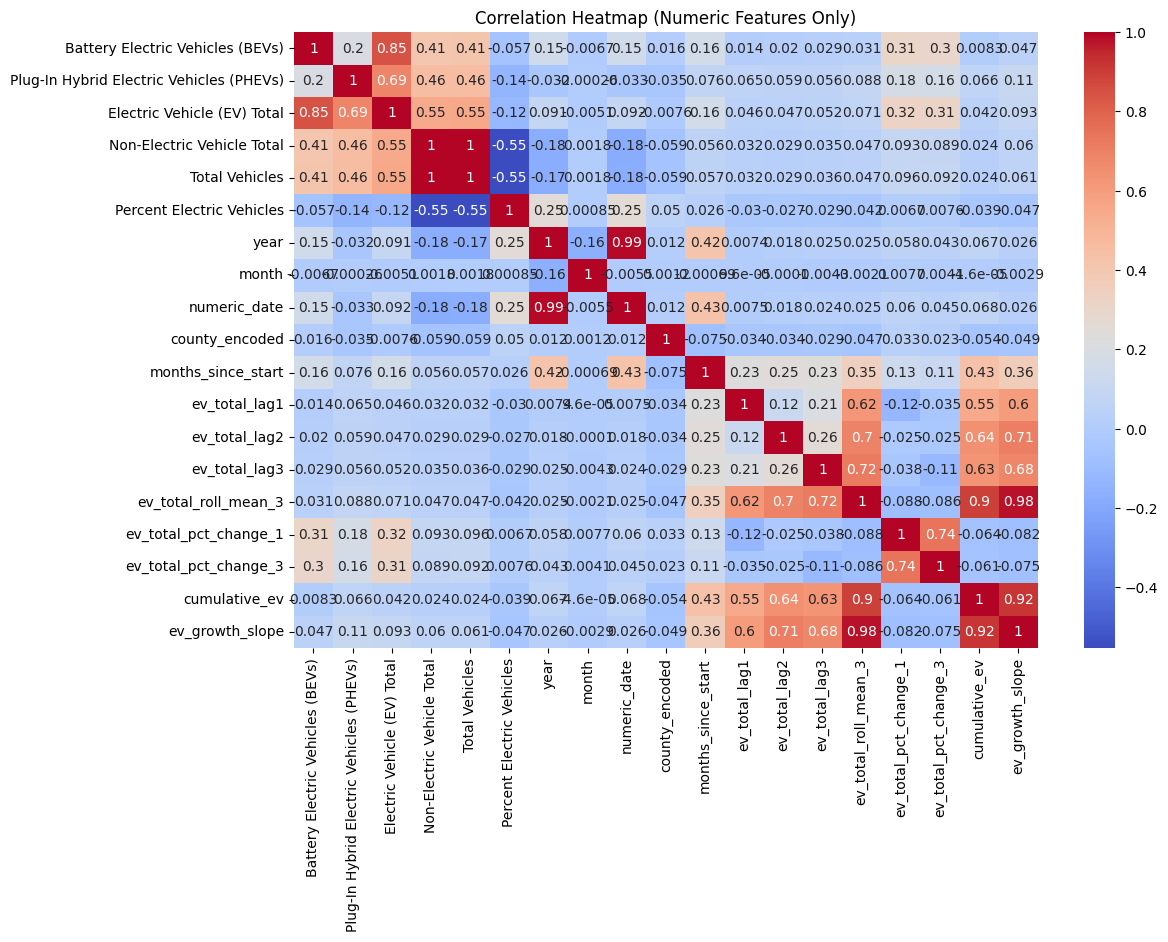


📊 Model Performance:
Mean Squared Error: 8.222431431402142e-27
R² Score: 1.0


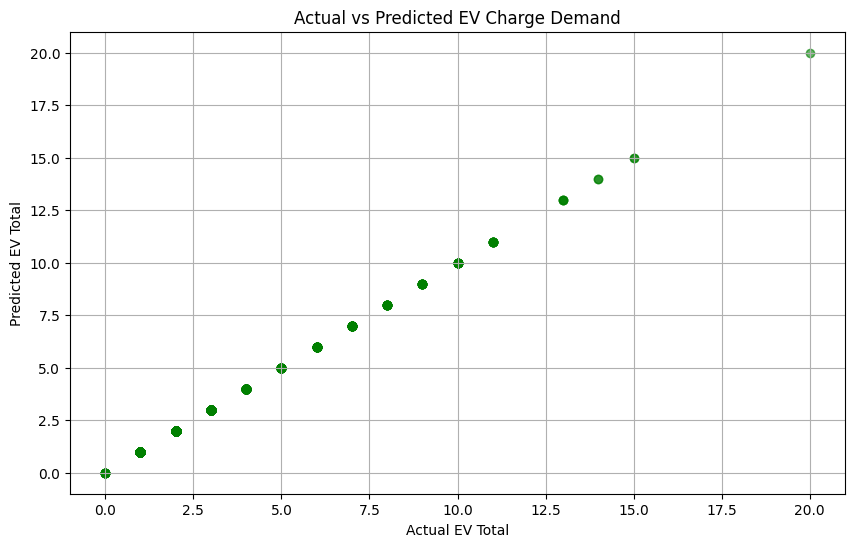

In [13]:
# 📦 Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 📁 Load Dataset
df = pd.read_csv('/content/preprocessed_ev_data.csv')

# 🔍 Quick Look at the Data
print("First 5 rows of data:")
print(df.head())

print("\nBasic Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# 📊 Correlation Heatmap (only numeric data)
plt.figure(figsize=(12,8))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

# ✅ Set correct target column name
target = 'Electric Vehicle (EV) Total'

# ✅ Exclude non-numeric and non-useful columns
excluded = ['Date', 'County', 'State', 'Vehicle Primary Use', target]
features = [col for col in df.columns if col not in excluded and df[col].dtype in [np.int64, np.float64]]

# 📤 Features and Target Separation
X = df[features]
y = df[target]

# 📤 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# 📈 Prediction
y_pred = model.predict(X_test)

# 📊 Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Performance:")
print("Mean Squared Error:", mse)
print("R² Score:", r2)

# 📉 Actual vs Predicted Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.xlabel("Actual EV Total")
plt.ylabel("Predicted EV Total")
plt.title("Actual vs Predicted EV Charge Demand")
plt.grid(True)
plt.show()
